# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

Это задание посвящено линейной регрессии. На примере прогнозирования роста человека по его весу Вы увидите, какая математика за этим стоит, а заодно познакомитесь с основными библиотеками Python, необходимыми для дальнейшего прохождения курса.

**Материалы**

- Лекции данного курса по линейным моделям и градиентному спуску
- [Документация](http://docs.scipy.org/doc/) по библиотекам NumPy и SciPy
- [Документация](http://matplotlib.org/) по библиотеке Matplotlib 
- [Документация](http://pandas.pydata.org/pandas-docs/stable/tutorials.html) по библиотеке Pandas
- [Pandas Cheat Sheet](http://www.analyticsvidhya.com/blog/2015/07/11-steps-perform-data-analysis-pandas-python/)
- [Документация](http://stanford.edu/~mwaskom/software/seaborn/) по библиотеке Seaborn 

## Задание 1. Первичный анализ данных c Pandas

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

**[1].** Если у Вас не установлена библиотека Seaborn - выполните в терминале команду *conda install seaborn*. (Seaborn не входит в сборку Anaconda, но эта библиотека предоставляет удобную высокоуровневую функциональность для визуализации данных).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
%matplotlib inline

In [26]:
!pwd

/Users/out-plotkina-av/Downloads/coursera


Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')


Чаще всего первое, что надо надо сделать после считывания данных - это посмотреть на первые несколько записей. Так можно отловить ошибки чтения данных (например, если вместо 10 столбцов получился один, в названии которого 9 точек с запятой). Также это позволяет познакомиться с данными, как минимум, посмотреть на признаки и их природу (количественный, категориальный и т.д.). 

После этого стоит построить гистограммы распределения признаков - это опять-таки позволяет понять природу признака (степенное у него распределение, или нормальное, или какое-то еще). Также благодаря гистограмме можно найти какие-то значения, сильно не похожие на другие - "выбросы" в данных. 
Гистограммы удобно строить методом *plot* Pandas DataFrame с аргументом *kind='hist'*.

**Пример.** Построим гистограмму распределения роста подростков из выборки *data*. Используем метод *plot* для DataFrame *data* c аргументами *y='Height'* (это тот признак, распределение которого мы строим)

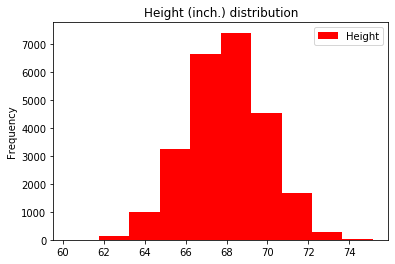

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

Аргументы:

- *y='Height'* - тот признак, распределение которого мы строим
- *kind='hist'* - означает, что строится гистограмма
- *color='red'* - цвет

**[2]**. Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [4]:
data.head()

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


Text(0.5, 0.98, 'последняя подпись')

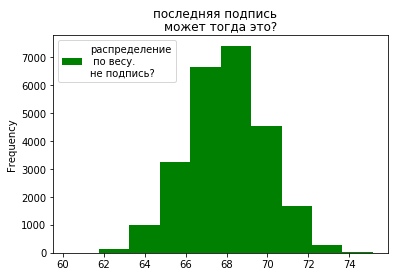

In [5]:
data.plot(y='Height', kind='hist', 
           color='green',title = 'Это разве не подпись?',  label='распределение\n по весу.\nне подпись?')
plt.legend(loc = 'upper left')
plt.title("может тогда это?")
plt.suptitle("последняя подпись")
# я так и не поняла чем плох title =(

Один из эффективных методов первичного анализа данных - отображение попарных зависимостей признаков. Создается $m \times m$ графиков (*m* - число признаков), где по диагонали рисуются гистограммы распределения признаков, а вне диагонали - scatter plots зависимости двух признаков. Это можно делать с помощью метода $scatter\_matrix$ Pandas Data Frame или *pairplot* библиотеки Seaborn. 

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python.

In [6]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [7]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**[3].** Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

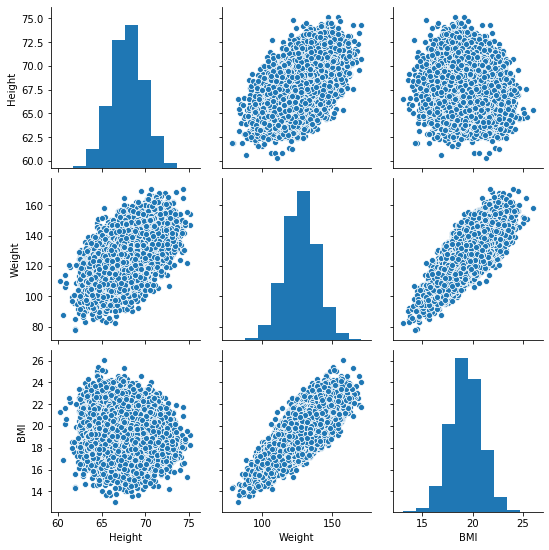

In [8]:
data.head()
sns.pairplot(data, diag_kind="hist")

Часто при первичном анализе данных надо исследовать зависимость какого-то количественного признака от категориального (скажем, зарплаты от пола сотрудника). В этом помогут "ящики с усами" - boxplots библиотеки Seaborn. Box plot - это компактный способ показать статистики вещественного признака (среднее и квартили) по разным значениям категориального признака. Также помогает отслеживать "выбросы" - наблюдения, в которых значение данного вещественного признака сильно отличается от других. 

**[4]**. Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».

In [9]:
def weight_category(weight):
        if weight < 120:
            return 1
        elif weight >= 150:
            return 3
        else:
            return 2

data['weight_cat'] = data['Weight'].apply(weight_category)

# ax = sns.catplot(x='weight_cat', y = 'Height', data = data,kind = 'box')

Text(0.5, 0, 'Весовая категория')

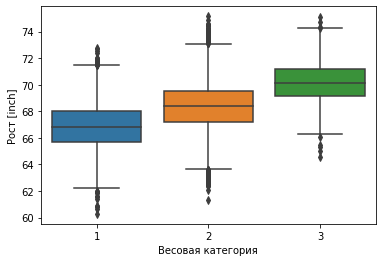

In [10]:
ax = sns.boxplot(x='weight_cat', y = 'Height',data = data)
plt.ylabel("Рост [inch]")
plt.xlabel("Весовая категория")

**[5].** Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

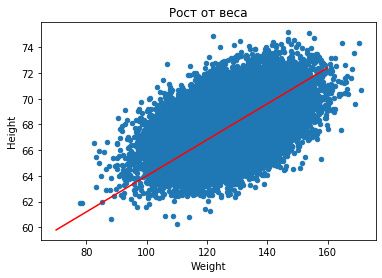

In [11]:
data.plot(x='Weight',y='Height', kind='scatter',title = 'Рост от веса')
# +п.9
x = np.linspace(70,160)
y_opt = [xx*0.14 + 50 for xx in x]
plt.plot(x, y_opt, color = 'red')

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки. 

**[6].** Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных. 

In [12]:
def error_0(w_0,w_1):
    er = 0
    for i in range(0,len(data)):
        er = er + (data.iloc[i]['Height'] - (w_0 + w_1 *data.iloc[i]['Weight']))**2
    return er

Итак, мы решаем задачу: как через облако точек, соответсвующих наблюдениям в нашем наборе данных, в пространстве признаков "Рост" и "Вес" провести прямую линию так, чтобы минимизировать функционал из п. 6. Для начала давайте отобразим хоть какие-то прямые и убедимся, что они плохо передают зависимость роста от веса.

**[7].** Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

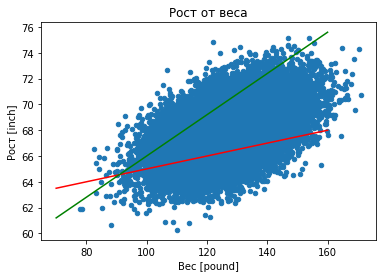

In [13]:
a_1 = error_0(60, 0.05)
a_2 = error_0(50, 0.16)
# print(a_1,a_2)
data.plot(x='Weight',y='Height', kind='scatter',title = 'Рост от веса')
plt.ylabel("Рост [inch]")
plt.xlabel("Вес [pound]")
x = np.linspace(70,160)
y_1 = [xx*0.05 + 60 for xx in x]
y_2 = [xx*0.16 + 50 for xx in x]
plt.plot(x, y_1, color = 'red')
plt.plot(x, y_2, color = 'green')

In [14]:
print(a_1, a_2)

138197.37942816826 225065.2491128768


Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

**[8].** Постройте график зависимости функции ошибки, посчитанной в п. 6, от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

In [15]:
def error_50(w_1):
    w_0 = 50
    return error_0(w_0, w_1)

In [16]:
# зависимость ошибки от w_1 при фиксированном свободном члене = 50
x = np.linspace(-5,5)
err_50 = [error_50(w_1) for w_1 in x]
# plt.plot(x, err_50, color = 'green')
# plt.ylabel("Ошибка")
# plt.xlabel("w_1 - коэфициент наклона")
# plt.title("Зависимость ошибки от наклона прямой")

In [17]:
err_50

[10760829453.72929,
 9923465097.88138,
 9120014008.117296,
 8350476184.43722,
 7614851626.84096,
 6913140335.328606,
 6245342309.900263,
 5611457550.555797,
 5011486057.295181,
 4445427830.118473,
 3913282869.025712,
 3415051174.016867,
 2950732745.091918,
 2520327582.250895,
 2123835685.4937546,
 1761257054.8205607,
 1432591690.2312365,
 1137839591.7258568,
 877000759.3043653,
 650075192.9667921,
 457062892.7131273,
 297963858.54337406,
 172778090.4575277,
 81505588.4555939,
 24146352.537569135,
 700382.7034543175,
 11167678.95324959,
 55548241.286955275,
 133842069.70457025,
 246049164.20609516,
 392169524.79153377,
 572203151.460876,
 786150044.2141305,
 1034010203.051299,
 1315783627.972368,
 1631470318.9773583,
 1981070276.0662506,
 2364583499.2390423,
 2782009988.4957747,
 3233349743.8363967,
 3718602765.260953,
 4237769052.769396,
 4790848606.361739,
 5377841426.038017,
 5998747511.798163,
 6653566863.642275,
 7342299481.570203,
 8064945365.58217,
 8821504515.677994,
 9611976931

Теперь методом оптимизации найдем "оптимальный" наклон прямой, приближающей зависимость роста от веса, при фиксированном коэффициенте $w_0 = 50$.

**[9].** С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$. 

In [18]:
res = minimize_scalar(error_50, [-5,5])
# Прямая добавлена на рис в п.5
print(res.x)

0.14109203728833175


При анализе многомерных данных человек часто хочет получить интуитивное представление о природе данных с помощью визуализации. Увы, при числе признаков больше 3 такие картинки нарисовать невозможно. На практике для визуализации данных в 2D и 3D в данных выделаяют 2 или, соответственно, 3 главные компоненты (как именно это делается - мы увидим далее в курсе) и отображают данные на плоскости или в объеме. 

Посмотрим, как в Python рисовать 3D картинки, на примере отображения функции $z(x,y) = sin(\sqrt{x^2+y^2})$ для значений $x$ и $y$ из интервала [-5,5] c шагом 0.25.

In [19]:
from mpl_toolkits.mplot3d import Axes3D

Создаем объекты типа matplotlib.figure.Figure (рисунок) и  matplotlib.axes._subplots.Axes3DSubplot (ось). 

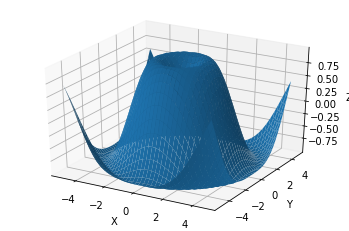

In [20]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [21]:
Z

array([[ 0.70886129,  0.57562789,  0.42921793, ...,  0.27541086,
         0.42921793,  0.57562789],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       ...,
       [ 0.27541086,  0.09046523, -0.09334004, ..., -0.26940744,
        -0.09334004,  0.09046523],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ]])

**[10].** Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

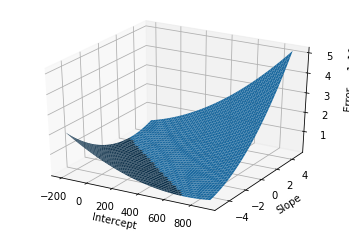

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-200, 900, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = error_0(X,Y)

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept') # свободный член
ax.set_ylabel('Slope') #наклон
ax.set_zlabel('Error')
plt.show()

In [23]:
Z

array([[2.04907072e+10, 2.04794164e+10, 2.04681287e+10, ...,
        1.04688633e+09, 1.04933614e+09, 1.05178907e+09],
       [1.90724863e+10, 1.90615926e+10, 1.90507021e+10, ...,
        1.37481614e+09, 1.37766308e+09, 1.38051313e+09],
       [1.77051566e+10, 1.76946600e+10, 1.76841666e+10, ...,
        1.75363705e+09, 1.75688111e+09, 1.76012829e+09],
       ...,
       [1.91000477e+09, 1.91340752e+09, 1.91681338e+09, ...,
        4.70737587e+10, 4.70909021e+10, 4.71080486e+10],
       [2.37475443e+09, 2.37855430e+09, 2.38235729e+09, ...,
        4.92846591e+10, 4.93021996e+10, 4.93197432e+10],
       [2.89039518e+09, 2.89459217e+09, 2.89879229e+09, ...,
        5.15464505e+10, 5.15643881e+10, 5.15823288e+10]])

In [24]:
# Ваш код здесь

**[11].** С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [25]:
x0 = np.array([-100,0])
# w0 = np.linspace(-5,5)
# w1 = [i for i in range(-100,1000,5)]
# from scipy.optimize import Bounds
# bound = Bounds([-100, 100], [-5, 5])
w_0 = (-100, 100)
w_1 = (-5, 5)
x_0 = [0, 0]
w_0

(-100, 100)

In [68]:
res = minimize(error_0, [0,0], bounds= (w_0,w_1), method='L-BFGS-B')
res
# =[w0, w1] bounds=[w0, w1]
# (w0, w1)

# res = minimize(squaredError, [0,0], bounds=[(w0, w1)], method='L-BFGS-B')
# res

TypeError: error_0() missing 1 required positional argument: 'w_1'

In [65]:
res = minimize(error_0, [0,0], bounds=(w_0, w_1), method='L-BFGS-B')
res

TypeError: error_0() missing 1 required positional argument: 'w_1'

In [ ]:
from scipy.optimize import minimize
w0 = (-100, 100)
w1 = (-5, 5)

res = minimize(error_0, [0,0], bounds=[w0, w1], method='L-BFGS-B')
res

## Критерии оценки работы

- Выполняется ли тетрадка IPython без ошибок? (15 баллов)
- Верно ли отображена гистограмма распределения роста из п. 2? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображены попарные зависимости признаков из п. 3? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображена зависимость роста от весовой категории из п. 4? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Верно ли отображен scatter plot роста от веса из п. 5? (3 балла). Правильно ли оформлены подписи? (1 балл)
- Правильно ли реализована функция подсчета квадратичной ошибки из п. 6? (10 баллов)
- Правильно ли нарисован график из п. 7? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован график из п. 8? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize\_scalar из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 9? (3 балла) Правильно ли оформлены подписи? (1 балл)
- Правильно ли нарисован 3D-график из п. 10? (6 баллов) Правильно ли оформлены подписи? (1 балл)
- Правильно ли используется метод minimize из scipy.optimize? (6 баллов). Правильно ли нарисован график из п. 11? (3 балла). Правильно ли оформлены подписи? (1 балл)